In [60]:
import glob
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os

In [61]:
def actual_counts(bias_image):
    return bias_image / 16 + 1

In [62]:
directory_path = 'C:/Users/naiya/Downloads/naiya_rye_copy_2/bias'

In [63]:
bias_images = glob.glob(os.path.join(directory_path, "*.fit"))

image_data_list = []

In [64]:
for file in bias_images:
    with fits.open(file) as foo:
        foo.info()
        bias_image = foo[0].data  
        fixed_image = actual_counts(bias_image)
        image_data_list.append(fixed_image)

Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/bias\Autosave Image (Bias-Naiya-Rye)-0001.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/bias\Autosave Image (Bias-Naiya-Rye)-0002.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/bias\Autosave Image (Bias-Naiya-Rye)-0003.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/bias\Autosave Image (Bias-Naiya-Rye)-0004.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:

In [65]:
image_data_stack = np.array(image_data_list)
average_image_bias = np.mean(image_data_stack, axis=0)

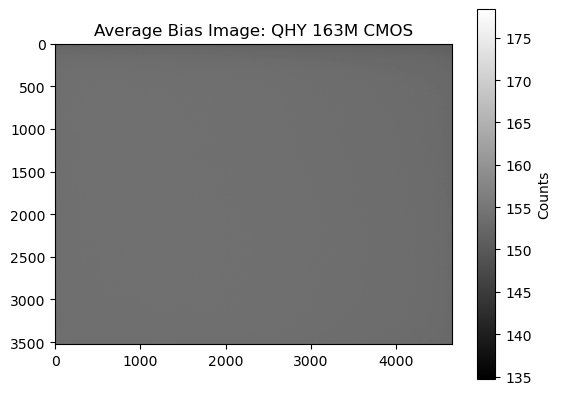

In [66]:
plt.imshow(average_image_bias, cmap='gray')
plt.colorbar(label='Counts')
plt.title('Average Bias Image: QHY 163M CMOS')
plt.show()

In [75]:
#Median of that^
median_bias = np.median(average_image_bias)
print(median_bias)

153.65


In [76]:
#Below will be our twilight flat stuff

In [77]:
#Converting twilight data back to real
def actual_counts(twilight_flat):
    return twilight_flat / 16 + 1

In [78]:
directory_path_two = 'C:/Users/naiya/Downloads/naiya_rye_copy_2/twilights'

In [79]:
twilight_flats = glob.glob(os.path.join(directory_path, "*.fit"))

normalized_twilight_flats = []

In [80]:
#Loop for my flatz
for file in twilight_flats:
    with fits.open(file) as foo:
        twilight_image = foo[0].data
        
        normalized_flat = (twilight_image - average_image_bias) / median_bias
        
        normalized_twilight_flats.append(normalized_flat)

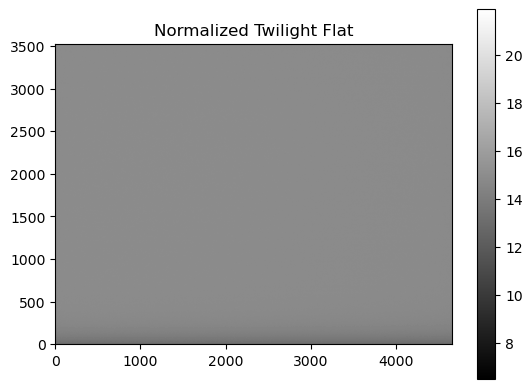

In [81]:
plt.imshow(normalized_twilight_flats[0], cmap='gray', origin='lower')
plt.colorbar()  
plt.title('Normalized Twilight Flat')
plt.show() 

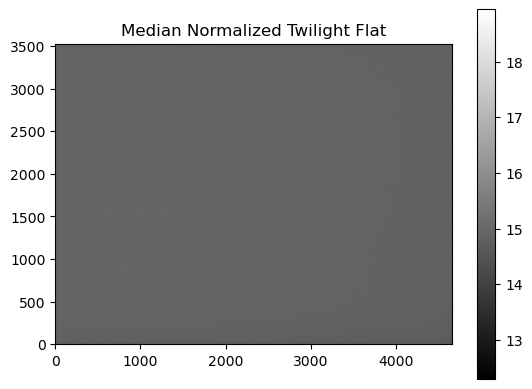

In [117]:
# Median flats- have to use 32 instead of 64 because low RAM lol
normalized_twilight_stack = np.array(normalized_twilight_flats, dtype=np.float32)

# Median value
median_normalized_twilight_flat = np.median(normalized_twilight_stack, axis=0)

# Plot the median normalized twilight flat
import matplotlib.pyplot as plt
plt.imshow(median_normalized_twilight_flat, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Median Normalized Twilight Flat')
plt.show()

In [118]:
#Below are darks

In [133]:
directory_path_three = 'C:/Users/naiya/Downloads/naiya_rye_copy_2/darks'
dark_images_3 = glob.glob(os.path.join(directory_path_three, "*.fit"))
darks_list_3 = []

In [135]:
def actual_counts(dark_images_3):
    return dark_images_3 / 16 + 1

In [136]:
for file in dark_images_3:
    with fits.open(file) as foo:
        foo.info()
        dark_images_3 = foo[0].data  
        fixed_image_3 = actual_counts(dark_images_3)
        darks_list_3.append(fixed_image_3)

Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks\Darks 3s right this time-0001.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks\Darks 3s right this time-0002.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks\Darks 3s right this time-0003.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks\Darks 3s right this time-0004.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/n

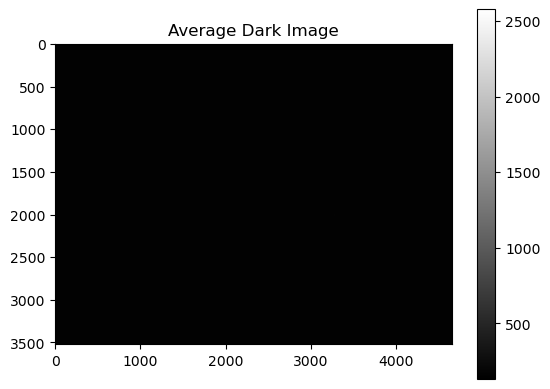

In [138]:
dark_stack_3 = np.array(darks_list_3)
average_dark_image = np.mean(dark_stack_3, axis=0)
    
    
plt.imshow(average_dark_image, cmap='gray')
plt.colorbar()
plt.title("Average Dark Image")
plt.show()

In [26]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits

In [27]:
directory_path_four = 'C:/Users/naiya/Downloads/naiya_rye_copy_2/darks_10'
dark_images_10 = glob.glob(os.path.join(directory_path_four, "*.fit"))
darks_list_10 = []

In [28]:
def actual_counts(dark_images_10):
    return dark_images_10 / 16 + 1

In [29]:
for file in dark_images_10:
    with fits.open(file) as foo:
        foo.info()
        dark_images_10 = foo[0].data  
        fixed_image_10 = actual_counts(dark_images_10)
        darks_list_10.append(fixed_image_10)

Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks_10\Darks 10s-0001.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks_10\Darks 10s-0002.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks_10\Darks 10s-0003.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks_10\Darks 10s-0004.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (4656, 3522)   int16 (rescales to uint16)   
Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/darks_10\Darks 10s-0005.fit
No. 

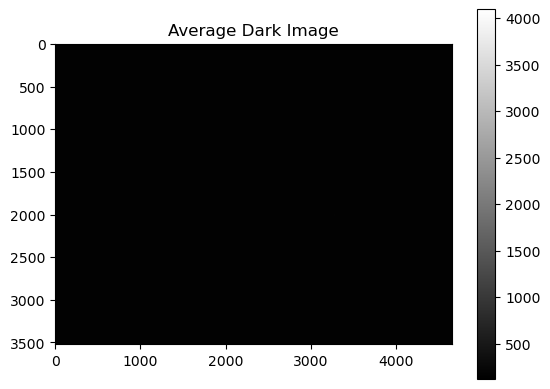

In [56]:
dark_stack_10 = np.array(darks_list_10)
average_dark_image_10 = np.mean(dark_stack_10, axis=0)
    
    
plt.imshow(average_dark_image_10, cmap='gray')
plt.colorbar()
plt.title("Average Dark Image")
plt.show()

In [32]:
#Below is random error! 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [43]:
def actual_counts(image):
    return image / 16 + 1

In [44]:
#First bias image
bias_one = 'C:/Users/naiya/Downloads/naiya_rye_copy_2/bias/Autosave Image (Bias-Naiya-Rye)-0001.fit'
with fits.open(bias_one) as bias1:
    bias_image1 = bias1[0].data
bias_image1_corrected = actual_counts(bias_image1)

In [45]:
#Second bias image
bias_two = 'C:/Users/naiya/Downloads/naiya_rye_copy_2/bias/Autosave Image (Bias-Naiya-Rye)-0002.fit'
with fits.open(bias_two) as bias2:
    bias_image2 = bias2[0].data
bias_image2_corrected = actual_counts(bias_image2)

In [46]:
#Calculating difference
difference_image = bias_image1_corrected - bias_image2_corrected

In [47]:
#Making data histogramable
pixel_variations = difference_image.flatten()

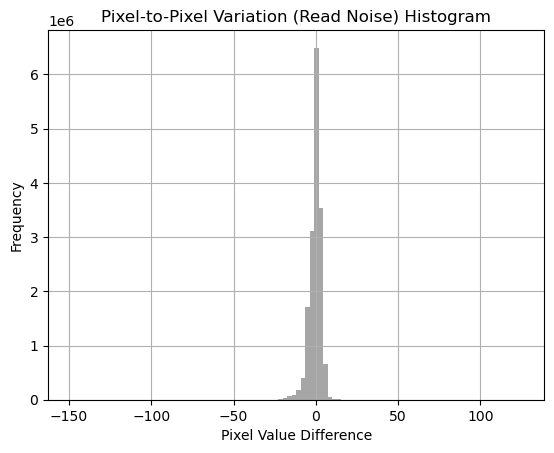

In [48]:
#Plotting
plt.hist(pixel_variations, bins=100, color='gray', alpha=0.7)
plt.title('Pixel-to-Pixel Variation (Read Noise) Histogram')
plt.xlabel('Pixel Value Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [49]:
#Correcting science images!

In [ ]:
def actual_counts(aquarii_image):
    return aquarii_image / 16 + 1

In [50]:
#Starting w Aquarii Nu because it looked the most clear in our CCD 
aquarii_nu = 'C:/Users/naiya/Downloads/naiya_rye_copy_2/aquarius/Rye_Naiya new_aq3.fit'

In [54]:
foo = fits.open(aquarii_nu)
foo.info()
aquarii_image = foo[0].data
aquarii_header = foo[0]
fixed_aquarii = actual_counts(aquarii_image)

Filename: C:/Users/naiya/Downloads/naiya_rye_copy_2/aquarius/Rye_Naiya new_aq3.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (4656, 3522)   int16 (rescales to uint16)   


In [89]:
fixed_aquarii = np.array(fixed_aquarii)  # Convert to NumPy array if it's a list
average_dark_image_10 = np.array(average_dark_image_10)
average_image_bias = np.array(average_image_bias)
normalized_twilight_flats = np.array(normalized_twilight_flats)

In [90]:
#Saving memory lol
fixed_aquarii = fixed_aquarii.astype(np.float32)
average_dark_image_10 = average_dark_image_10.astype(np.float32)
average_image_bias = average_image_bias.astype(np.float32)
normalized_twilight_flats = normalized_twilight_flats.astype(np.float32)

In [91]:
#Equation
reduced_image = (fixed_aquarii - average_dark_image_10 - average_image_bias / normalized_twilight_flats)

In [ ]:
#Plotting
plt.imshow(reduced_image, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Reduced Image of Aquarii Nu')
plt.show()